# Black Friday Dataset Exploration

In [0]:
import pandas as pd
import seaborn as sns
import io
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [0]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


## Data Loader

In [0]:
df = pd.read_csv('drive/My Drive/BlackFriday.csv')

## EDA

In [0]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [0]:
original_data = df.copy()

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [0]:
# check NaN values in the data
df.isna().any()

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2             True
Product_Category_3             True
Purchase                      False
dtype: bool

In [0]:
# I see that NaN vals appears only on Product_Category_#{2,3} so I can assume that the user didnt buy this product
df.fillna(value=0,inplace=True)

In [0]:
for col in df.columns:
      print('{} | contains {} unique values'.format(col,df[col].nunique()))

User_ID | contains 5891 unique values
Product_ID | contains 3623 unique values
Gender | contains 2 unique values
Age | contains 7 unique values
Occupation | contains 21 unique values
City_Category | contains 3 unique values
Stay_In_Current_City_Years | contains 5 unique values
Marital_Status | contains 2 unique values
Product_Category_1 | contains 18 unique values
Product_Category_2 | contains 17 unique values
Product_Category_3 | contains 15 unique values
Purchase | contains 17959 unique values


Text(0.5, 1.0, 'Purchase Distribution')

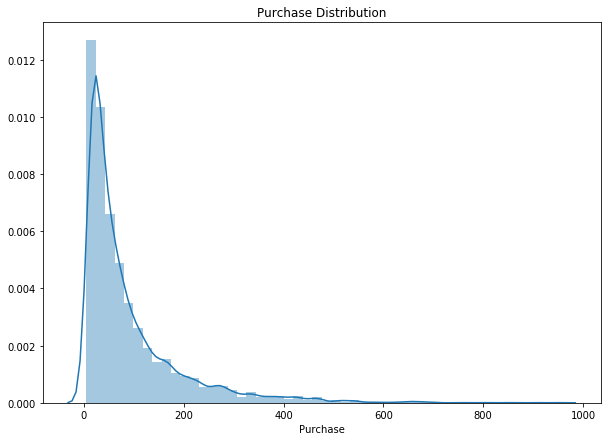

In [0]:
fig = plt.figure(figsize=(10,7))
pur = df.groupby('User_ID').nunique()['Purchase']  
sns.distplot(pur)
plt.title('Purchase Distribution')


Text(0.5, 1.0, 'User_ID Distribution')

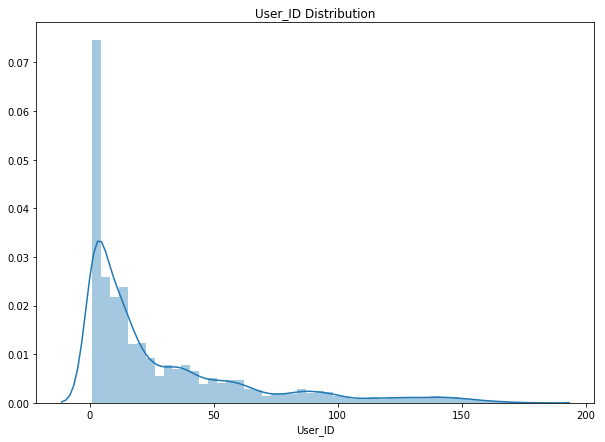

In [0]:
fig = plt.figure(figsize=(10,7))
pur = df.groupby('Purchase').nunique()['User_ID']  
sns.distplot(pur)
plt.title('User_ID Distribution')

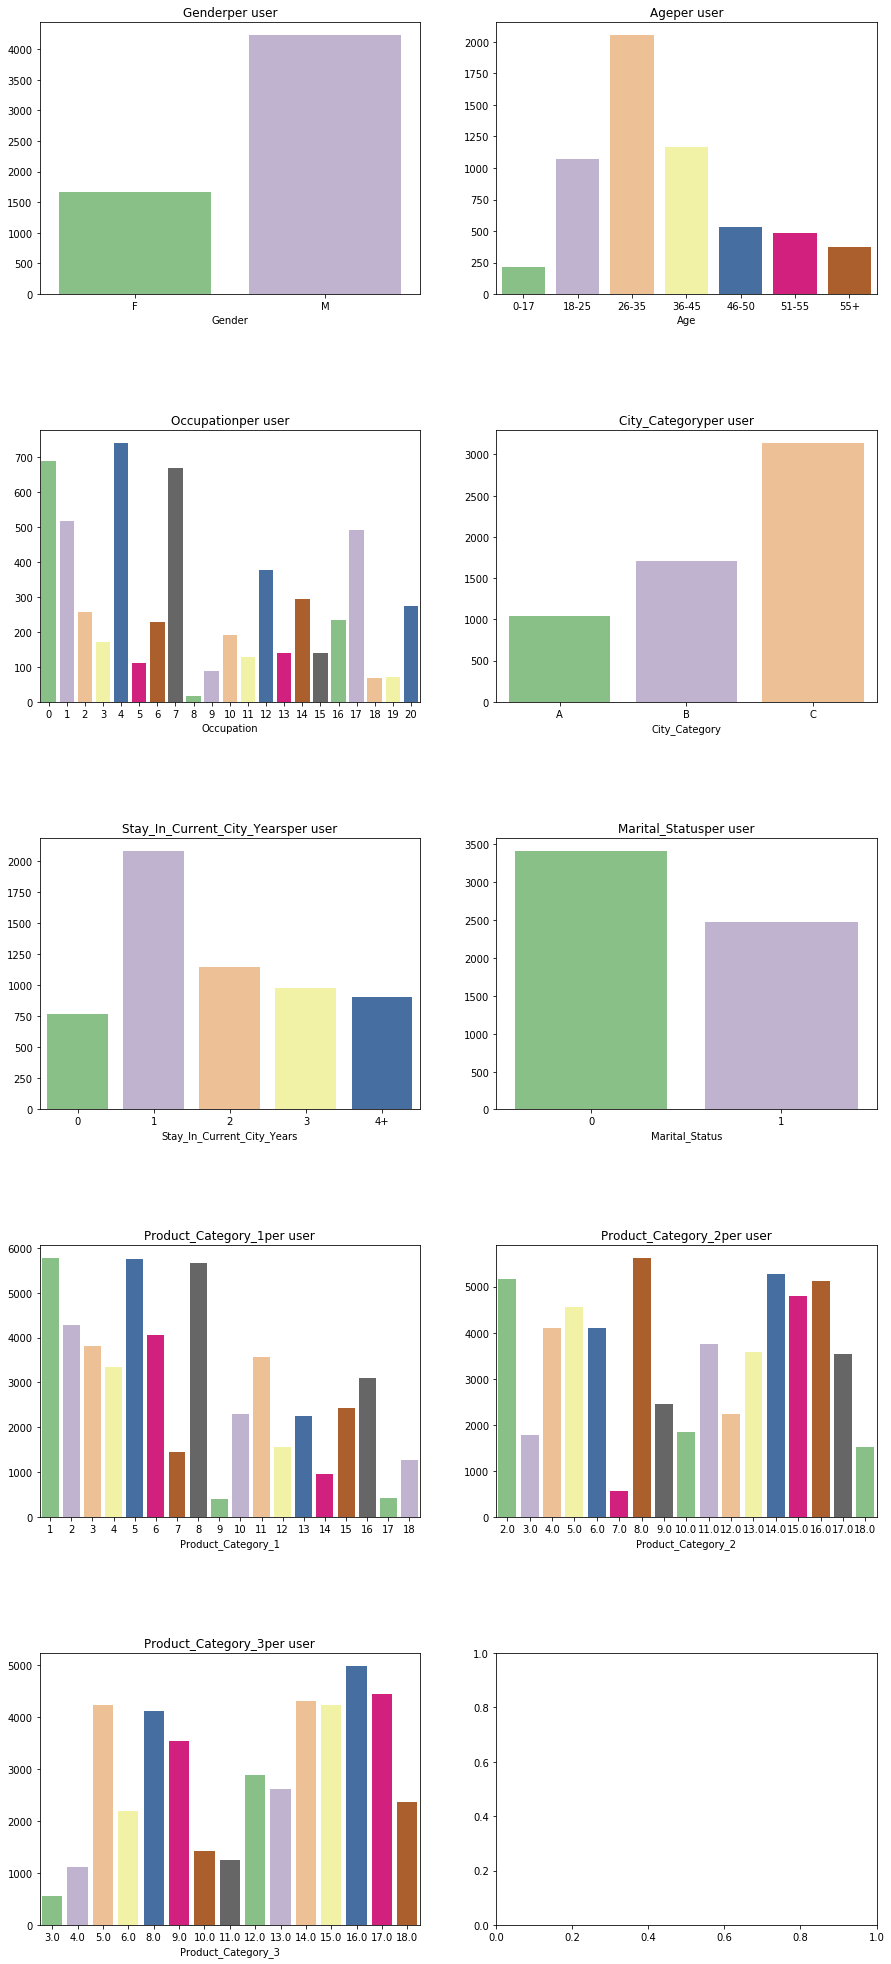

In [0]:
fig, axes = plt.subplots(nrows=5 ,ncols=2, figsize=(15,35))
names = ['Gender',	'Age'	,'Occupation'	,'City_Category',	'Stay_In_Current_City_Years',	'Marital_Status',	'Product_Category_1',	'Product_Category_2',	'Product_Category_3']
fig.subplots_adjust(wspace = 0.2 ,hspace=0.5)
for ax, name in zip(axes.flatten(), names):
  prod_byage = df.groupby(name).nunique()['User_ID']  
  sns.barplot(x=prod_byage.index,y=prod_byage.values, ax=ax, palette="Accent")
  ax.set(title=str(name + 'per user'), xlabel=name)

Text(0.5, 1.0, 'Number of Unique Items per Category')

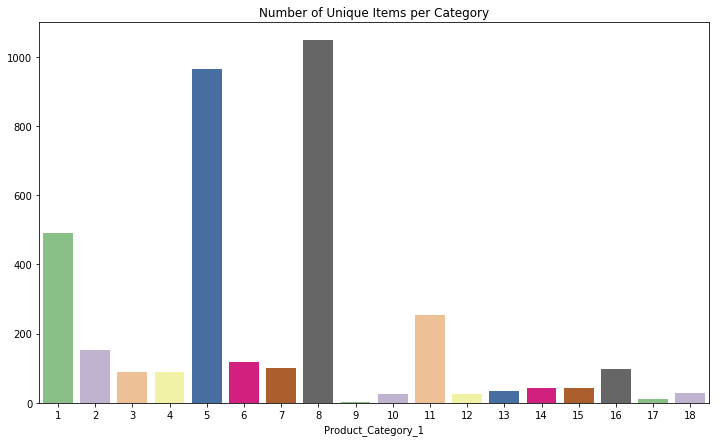

In [0]:
plt.figure(figsize=(12,7))
prod_by_cat = df.groupby('Product_Category_1')['Product_ID'].nunique()

sns.barplot(x=prod_by_cat.index,y=prod_by_cat.values, palette="Accent")
plt.title('Number of Unique Items per Category')


Text(0.5, 1.0, 'Mean Purchases per Age Group')

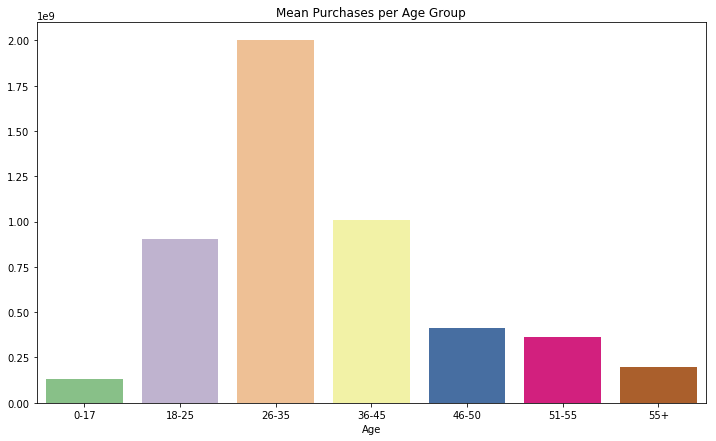

In [0]:
spent_byage = df.groupby(by='Age').sum()['Purchase']
plt.figure(figsize=(12,7))

sns.barplot(x=spent_byage.index,y=spent_byage.values, palette="Accent")
plt.title('Mean Purchases per Age Group')


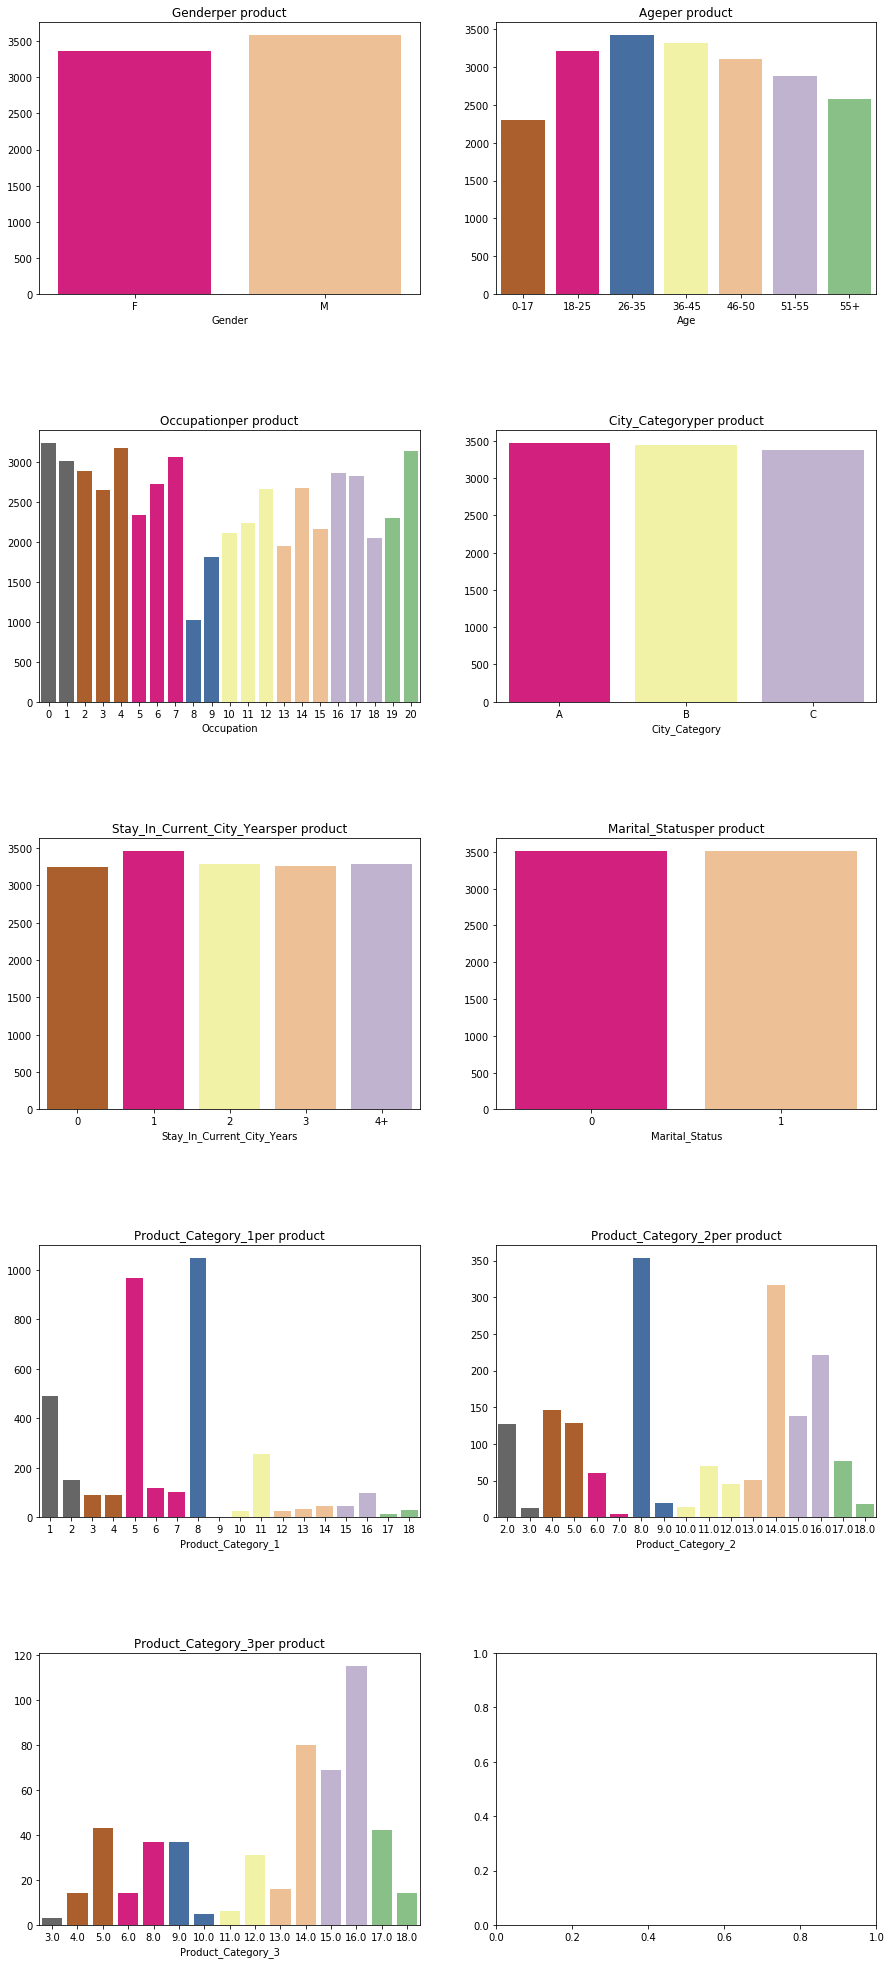

In [0]:
fig, axes = plt.subplots(nrows=5 ,ncols=2, figsize=(15,35))
names = ['Gender',	'Age'	,'Occupation'	,'City_Category',	'Stay_In_Current_City_Years',	'Marital_Status',	'Product_Category_1',	'Product_Category_2',	'Product_Category_3']
fig.subplots_adjust(wspace = 0.2 ,hspace=0.5)
for ax, name in zip(axes.flatten(), names):
  prod_byage = df.groupby(name).nunique()['Product_ID']  
  sns.barplot(x=prod_byage.index,y=prod_byage.values, ax=ax, palette="Accent_r")
  ax.set(title=str(name + ' per product'), xlabel=name)

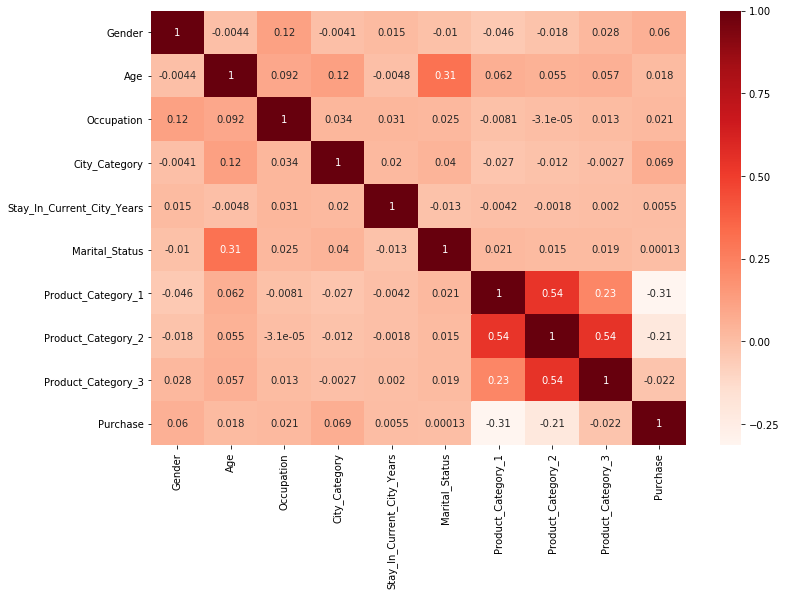

In [0]:
fig=plt.figure(figsize=(12,8))
X = df.drop(['User_ID','Product_ID'],axis=1)
sns.heatmap(X.corr(), annot= True, cmap='Reds') 

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Error in callback <function flush_figures at 0x7ff9778f12f0> (for post_execute):


KeyboardInterrupt: ignored

### boxplots are good indication of how the values in the data are spread out. 
### They are a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”).

* median (Q2/50th Percentile): the middle value of the dataset.

* first quartile (Q1/25th Percentile): the middle number between the smallest number (not the “minimum”) and the median of the dataset.

* third quartile (Q3/75th Percentile): the middle value between the median and the highest value (not the “maximum”) of the dataset.

* interquartile range (IQR): 25th to the 75th percentile.

* whiskers (shown as grey lines)

* outliers (shown as grey ellipses)

* “maximum”: Q3 + 1.5*IQR

* “minimum”: Q1 -1.5*IQR



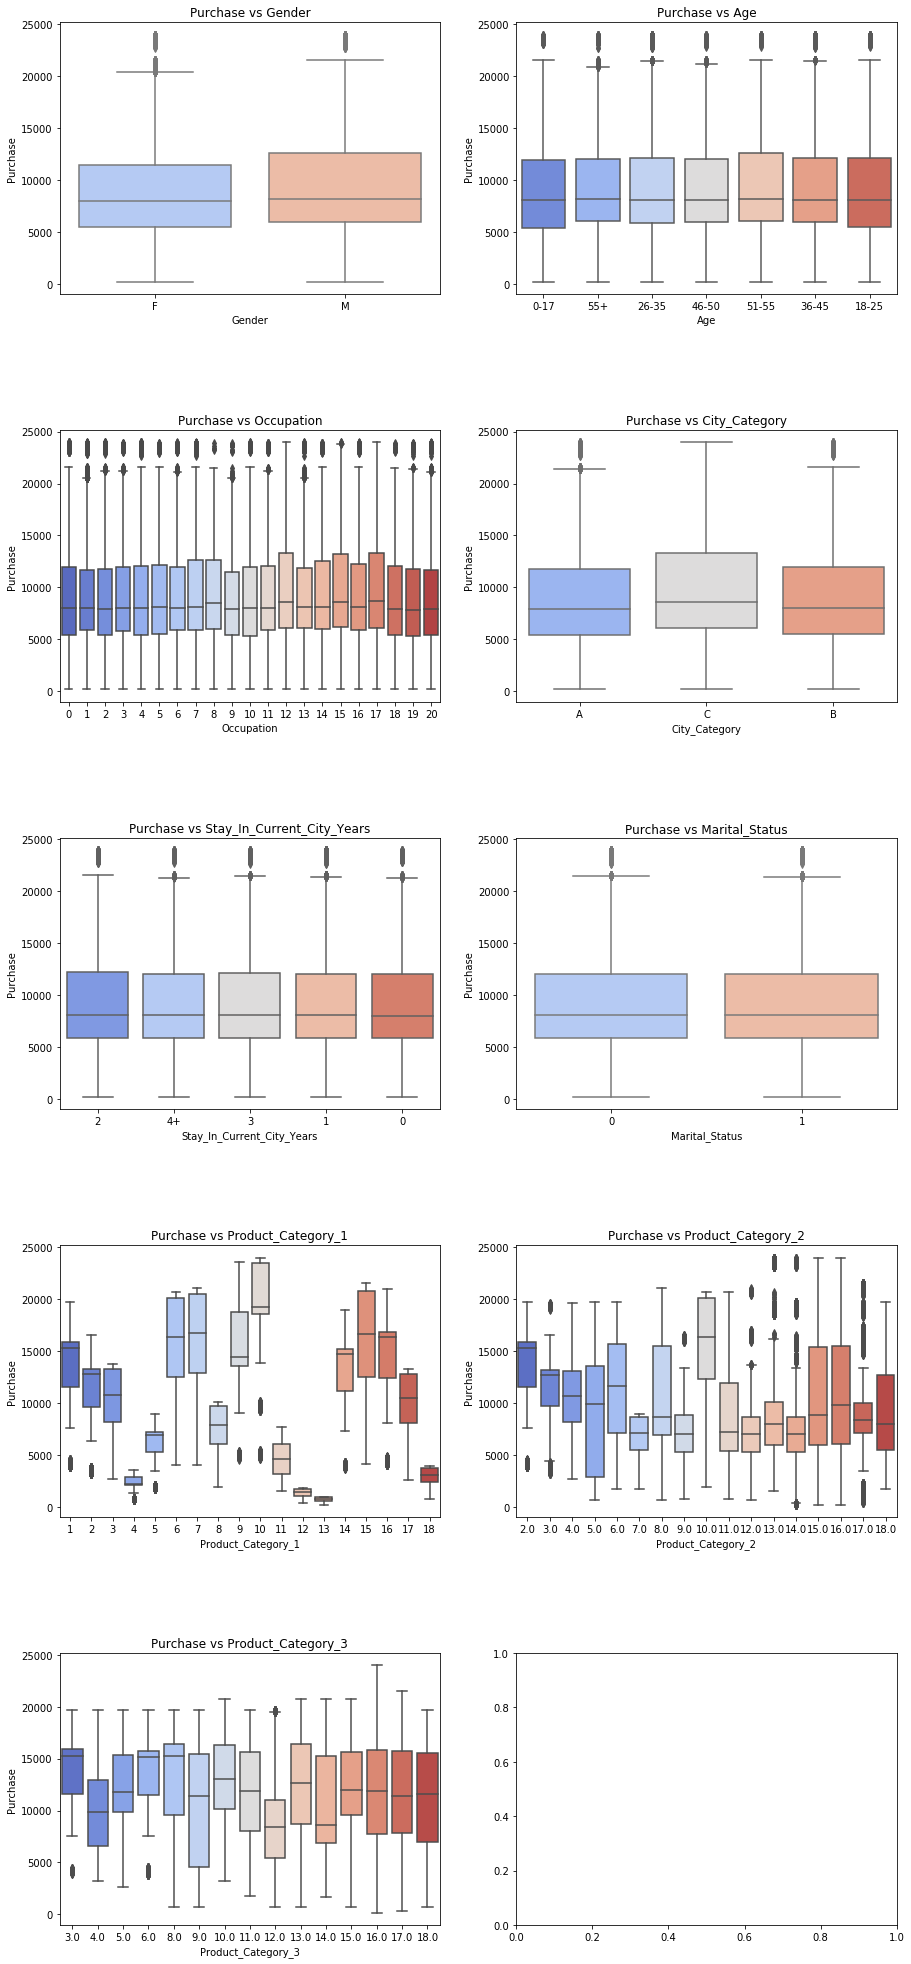

In [0]:
fig, axes = plt.subplots(nrows=5 ,ncols=2, figsize=(15,35))
names = ['Gender',	'Age'	,'Occupation'	,'City_Category',	'Stay_In_Current_City_Years',	'Marital_Status',	'Product_Category_1',	'Product_Category_2',	'Product_Category_3']
fig.subplots_adjust(wspace = 0.2 ,hspace=0.5)
for ax, name in zip(axes.flatten(), names):
    sns.boxplot(x=name ,y='Purchase', data=original_data,ax=ax, palette='coolwarm')
    ax.set(title=str('Purchase' + ' vs ' + name), xlabel=name)

In [0]:
lb = LabelEncoder()
df['Gender'] = lb.fit_transform(df['Gender'])
df['Age'] = lb.fit_transform(df['Age'])
df['City_Category'] = lb.fit_transform(df['City_Category'])
df['Stay_In_Current_City_Years'] = lb.fit_transform(df['Stay_In_Current_City_Years'])

### lets see if we can find some correlations 

# Preprocessing

### We can see from the EDA that for every catagory we have outliers regarding the purchases, as this is a reggrassion problem its probably good to get rid of them so we can get a better fit of the data

In [0]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out
  
X = remove_outlier(df, 'Purchase')

In [0]:
fig=plt.figure(figsize=(12,8))
sns.heatmap(X.corr(), annot= True, cmap='Reds') 

### lets convert the features:  ,Product_Category_#,  Marital_Status, Occupation etc. to Categorial Vars

In [0]:
# from the histo graph we see that Product_Category_#{1,2} only has whole number so I convert it into ints
# turns float64 to int and then to category
# turn to category vals, cause its has a fixed range of possible vals

X.Gender = X.Gender.astype('category')
X.Age = X.Age.astype('category')
X.City_Category = X.City_Category.astype('category')
X.Stay_In_Current_City_Years = X.Stay_In_Current_City_Years.astype('category')
X.Marital_Status = df.Marital_Status.astype('category')
X.Occupation = X.Occupation.astype('category')
X.Product_Category_1 = X.Product_Category_1.astype('int').astype('category')
X.Product_Category_2 = X.Product_Category_2.astype('int').astype('category')



/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [0]:
# #X = X.drop(columns=['User_ID', 'Product_ID'])

# df_encoded = pd.get_dummies(X)
# df_encoded.head()

,Purchase,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,Occupation_0,Occupation_1,Occupation_2,Occupation_3,Occupation_4,Occupation_5,Occupation_6,Occupation_7,Occupation_8,Occupation_9,Occupation_10,Occupation_11,Occupation_12,Occupation_13,Occupation_14,Occupation_15,Occupation_16,Occupation_17,Occupation_18,Occupation_19,Occupation_20,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,Marital_Status_0,Marital_Status_1,Product_Category_1_1,Product_Category_1_2,Product_Category_1_3,Product_Category_1_4,Product_Category_1_5,Product_Category_1_6,Product_Category_1_7,Product_Category_1_8,Product_Category_1_9,Product_Category_1_10,Product_Category_1_11,Product_Category_1_12,Product_Category_1_13,Product_Category_1_14,Product_Category_1_15,Product_Category_1_16,Product_Category_1_17,Product_Category_1_18,Product_Category_2_0,Product_Category_2_2,Product_Category_2_3,Product_Category_2_4,Product_Category_2_5,Product_Category_2_6,Product_Category_2_7,Product_Category_2_8,Product_Category_2_9,Product_Category_2_10,Product_Category_2_11,Product_Category_2_12,Product_Category_2_13,Product_Category_2_14,Product_Category_2_15,Product_Category_2_16,Product_Category_2_17,Product_Category_2_18
0,8370,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,15200,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1422,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1057,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,7969,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
from sklearn.preprocessing import LabelEncoder
le_U_ID = LabelEncoder()
X['User_ID'] = le_U_ID.fit_transform(X['User_ID'])
le_P_ID = LabelEncoder()
X['Product_ID'] = le_P_ID.fit_transform(X['Product_ID'])
X['Gender'] = np.where(X['Gender']=='M',1,0) # Female: 0, Male: 1
df_Age = pd.get_dummies(X.Age)
df_CC = pd.get_dummies(X.City_Category)
df_SIC = pd.get_dummies(X.Stay_In_Current_City_Years)
df_encoded = pd.concat([X,df_Age,df_CC,df_SIC],axis=1)
df_encoded.drop(['Age','City_Category','Stay_In_Current_City_Years'],axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [0]:
from sklearn.preprocessing import StandardScaler

df_frac = df_encoded.sample(frac=0.01,random_state=100)

labels = df_frac.pop('Purchase')
scaler = StandardScaler().fit(df_frac)
X_scaled = scaler.transform(df_frac)


### now lets convert all categories into one-hot vectors, so they can fit our model

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, labels, test_size=0.30,random_state=42)

In [0]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score


# feature importance
# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=100, max_depth=10,random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

feat_labels = ['User_ID',	'Product_ID',	'Gender',	'Occupation',	'Marital_Status',	'Product_Category_1',	'Product_Category_2',	'0-17',	'18-25',	'26-35',	'36-45',	'46-50',	'51-55',	'55+',	'A',	'B',	'C',	'0',	'1',	'2',	'3',	'4+']
# Print the name and gini importance of each feature
for feature in zip(feat_labels, clf.feature_importances_):
    print(feature)

('User_ID', 0.15790077510011963)
('Product_ID', 0.17106724297609413)
('Gender', 0.03693020038004941)
('Occupation', 0.09544503655828682)
('Marital_Status', 0.035930324510520376)
('Product_Category_1', 0.09686529347406614)
('Product_Category_2', 0.0998610705459455)
('0-17', 0.008831407566882412)
('18-25', 0.018600623743645135)
('26-35', 0.02247898840716364)
('36-45', 0.019710214116172655)
('46-50', 0.016616705823103713)
('51-55', 0.01440278386241713)
('55+', 0.010677701337619635)
('A', 0.02753025963710559)
('B', 0.028651999428667682)
('C', 0.02944769640129407)
('0', 0.019357818650864222)
('1', 0.02436934734348678)
('2', 0.022838617259669167)
('3', 0.021689288753361614)
('4+', 0.0207966041234646)


In [0]:
# from sklearn.decomposition import PCA

# pca=PCA(n_components = 40, whiten = False, random_state=876)
# data_scaled = pd.DataFrame(pca.fit_transform(d))

In [0]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, cross_val_predict

def Cross_Validation(estimator ,X, y):
    score=cross_val_score(estimator, X , y, cv=3, scoring = 'neg_mean_squared_error')
    return(np.sqrt(np.mean((-score))))
  
reg=LinearRegression(n_jobs=-1)
score_reg=Cross_Validation(reg, X_train, y_train)
print("RMSE is : ",score_reg)  
#print("Mean squared error: %.2f" % np.mean((reg.predict(X_transform) - y) ** 2))




RMSE is :  2997.7122690492624


In [0]:
reg.fit(X_train, y_train)

pred = cross_val_predict(reg, X_test, y_test)

pred


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


array([14092., 13364.,  7208., ...,  7564., 13841.,  7157.])

In [0]:
print("Mean squared error: %.2f" % np.mean((reg.predict(X_test) - y_test) ** 2))

Mean squared error: 8961206.92


In [0]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

y = labels
enc = OneHotEncoder(sparse=False)
X_transform = enc.fit_transform(d)

model = LinearRegression()
model.fit(X_transform, y)

print("Mean squared error: %.2f" % np.mean((model.predict(X_transform) - y) ** 2))

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


Mean squared error: 8975510.70
